In [ ]:
!pip install tensorflow tensorflow-cpu opencv-python matplotlib
!pip list
import tensorflow as tf
import os

In [ ]:
import tensorflow as tf
import os

In [ ]:
#remove bad images
import cv2
import imghdr
data_dir = 'Data1'
image_exts = ['jpeg','jpg', 'bmp', 'png']
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Found 48000 files belonging to 33 classes.


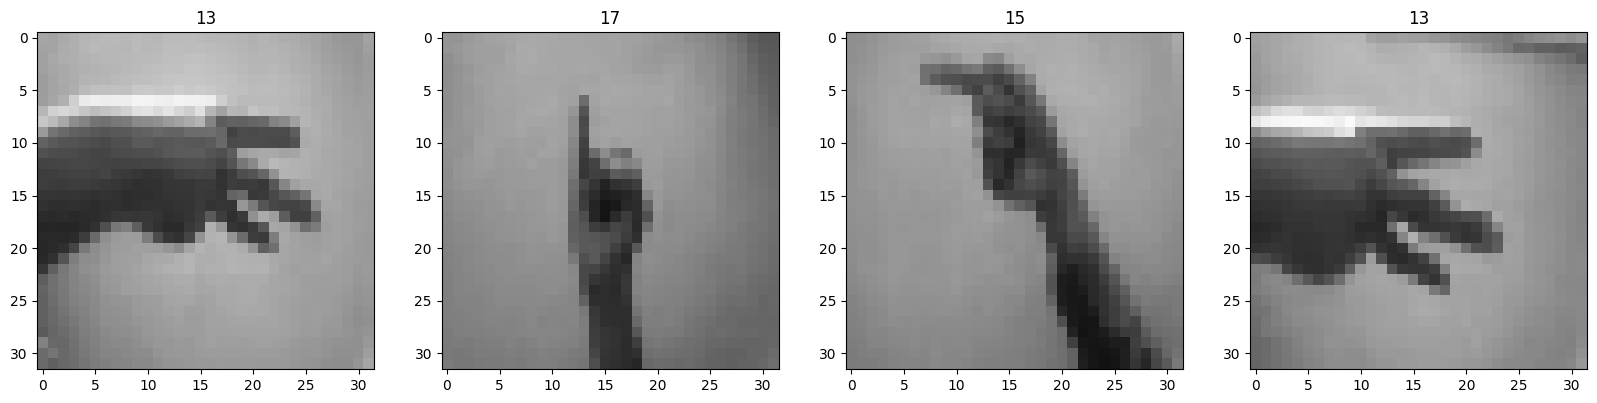

In [2]:
#load data
import numpy as np
from matplotlib import pyplot as plt
data = tf.keras.utils.image_dataset_from_directory('Data1', batch_size=32, image_size = (32,32))
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
# Scale Data
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

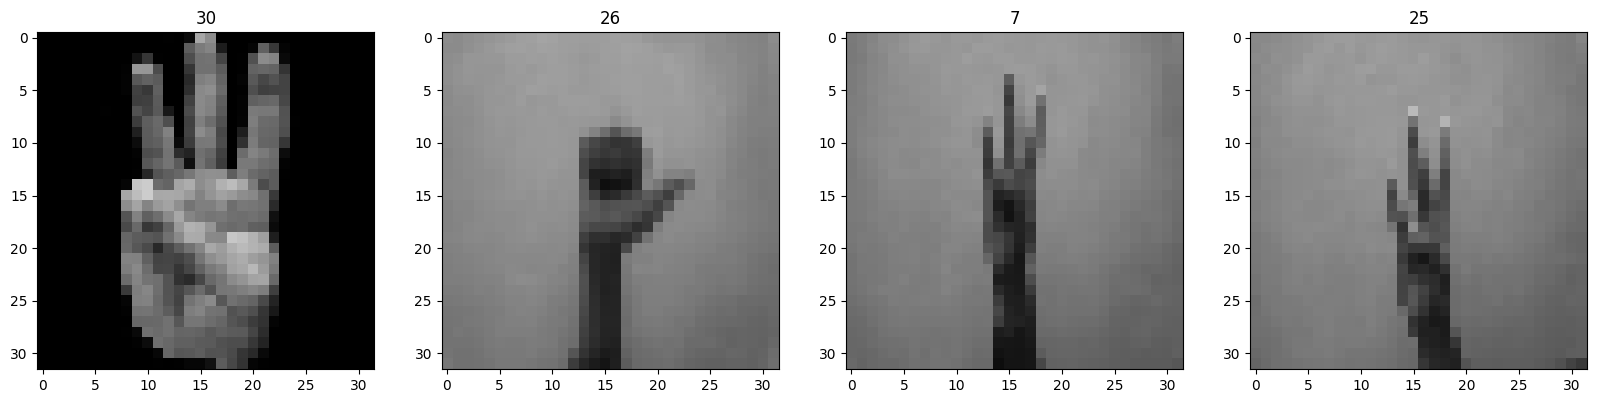

In [4]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [5]:
# Split Data
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)


train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, MaxPool2D, LSTM

In [9]:
#create trainning model
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Flatten())
#model.add(Dropout(0.5))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dense(33, activation='softmax'))

In [10]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
model.compile??

In [ ]:
model.summary()

In [ ]:
train

In [12]:
#trian
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20,  validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
1050/1050 [==============================] - 137s 131ms/step - loss: 0.6936 - accuracy: 0.7255 - val_loss: 0.5708 - val_accuracy: 0.7530
Epoch 2/10
1050/1050 [==============================] - 136s 129ms/step - loss: 0.4156 - accuracy: 0.7833 - val_loss: 1.1157 - val_accuracy: 0.5858
Epoch 3/10
1050/1050 [==============================] - 139s 133ms/step - loss: 0.3633 - accuracy: 0.7927 - val_loss: 0.3976 - val_accuracy: 0.7834
Epoch 4/10
1050/1050 [==============================] - 133s 127ms/step - loss: 0.3603 - accuracy: 0.7915 - val_loss: 0.6401 - val_accuracy: 0.7355
Epoch 5/10
1050/1050 [==============================] - 134s 128ms/step - loss: 0.3307 - accuracy: 0.8049 - val_loss: 0.3758 - val_accuracy: 0.7852
Epoch 6/10
1050/1050 [==============================] - 134s 127ms/step - loss: 0.3283 - accuracy: 0.8031 - val_loss: 0.4594 - val_accuracy: 0.7659
Epoch 7/10
1050/1050 [==============================] - 132s 126ms/step - loss: 0.3212 - accuracy: 0.8076 - val_

In [13]:
import pandas as pd

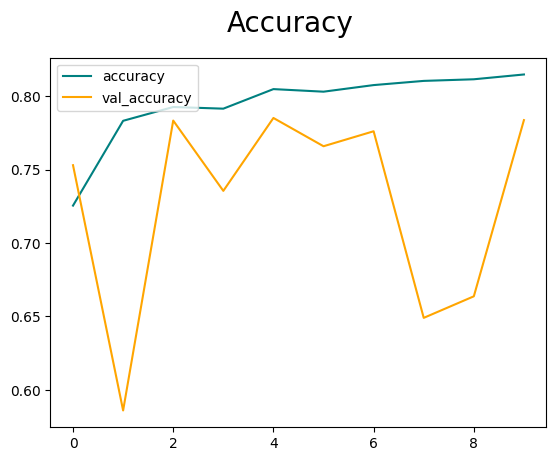

In [14]:
#Plot Performance
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

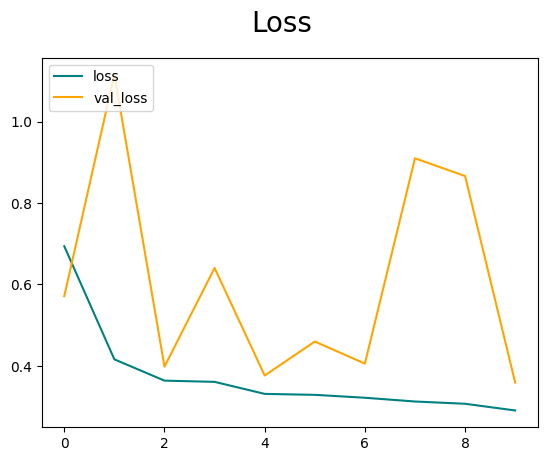

In [15]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [16]:
#Evaluate model
score = model.evaluate(test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.3825138807296753
Test accuracy: 0.768958330154419


In [ ]:
#save model
model.save(os.path.join('models_v3','aslmode7.h5'))

In [17]:
#test model with one image
import cv2

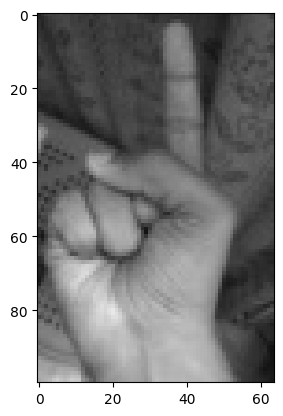

In [18]:
img = cv2.imread('one_13.jpg')
plt.imshow(img)
plt.show()

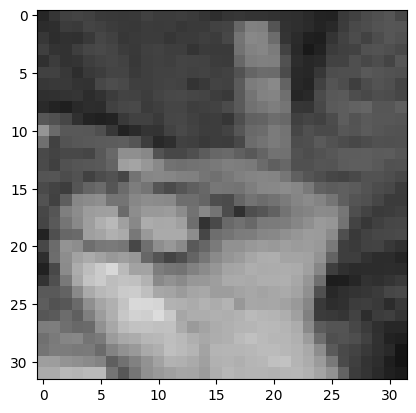

In [19]:
resize = tf.image.resize(img, (32,32))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [20]:
yhat = model.predict(np.expand_dims(resize/256, 0))
yhat

1/1 [==============================] - 0s 104ms/step


array([[3.13108612e-04, 9.79371071e-01, 5.31764328e-03, 4.14610520e-04,
        1.64531230e-04, 1.56413944e-06, 2.58492546e-05, 1.47128158e-04,
        6.02041728e-05, 3.76250767e-07, 2.41644331e-03, 7.07982254e-05,
        4.68091421e-05, 7.39405514e-05, 6.86947305e-06, 2.94345693e-04,
        2.40320674e-04, 2.43736475e-04, 5.33934915e-04, 5.12738619e-03,
        2.44937091e-05, 1.53947512e-05, 4.12107853e-04, 7.96749722e-04,
        9.36009565e-06, 9.17188518e-05, 4.04233928e-04, 1.11870286e-04,
        8.53659003e-05, 2.71962048e-03, 1.14264993e-04, 9.20260281e-05,
        2.52035796e-04]], dtype=float32)

In [21]:
print(yhat.argmax())   #print index of class

1


In [22]:
yhat[0].max() #print confidence

0.9793711

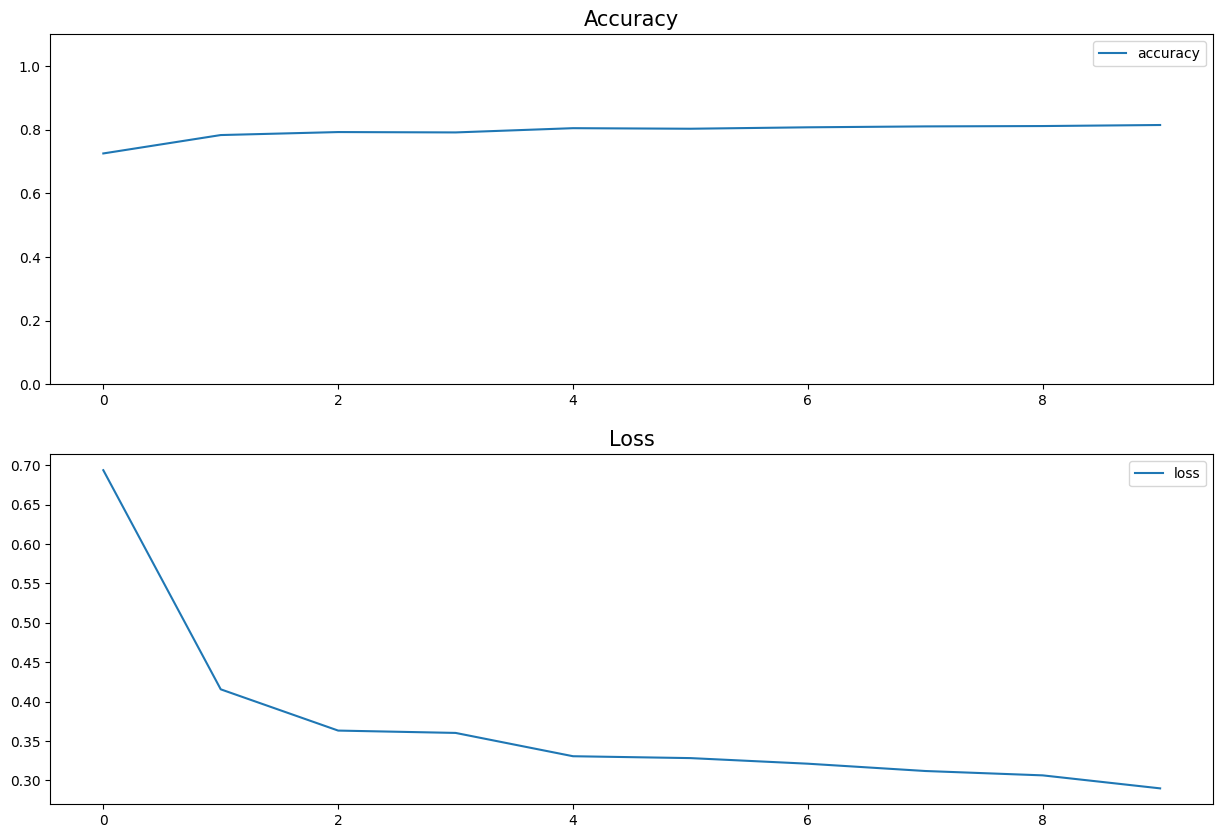

In [23]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
ax = axes.flat

pd.DataFrame(hist.history)[['accuracy']].plot(ax=ax[0])
ax[0].set_title("Accuracy", fontsize = 15)
ax[0].set_ylim(0,1.1)

pd.DataFrame(hist.history)[['loss']].plot(ax=ax[1])
ax[1].set_title("Loss", fontsize = 15)
plt.show()